In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, StratifiedKFold
import itertools

K_FOLD_SPLITS = 4

covertype_datasets = datasets.fetch_covtype()

In [2]:
# 1 index になっているので 0-index に直す
covertype_datasets.target -= 1
print(np.unique(covertype_datasets.target))

[0 1 2 3 4 5 6]


n_features 54


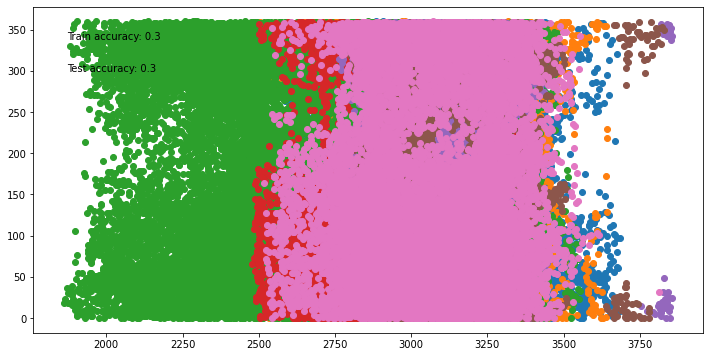

In [3]:

n_features = len(covertype_datasets.feature_names)
print("n_features", n_features)
n_classes = len(np.unique(covertype_datasets.target))

colors = ["C" + str(i) for i in range(n_classes)]

plt.figure(figsize=(12, 6))

skf = StratifiedKFold(n_splits=K_FOLD_SPLITS, shuffle=True)

train_accuracy_array = np.zeros(K_FOLD_SPLITS)
test_accuracy_array = np.zeros(K_FOLD_SPLITS)

for times, (train_index, test_index) in enumerate(skf.split(covertype_datasets.data, covertype_datasets.target)):
    X_train, X_test = covertype_datasets.data[train_index], covertype_datasets.data[test_index]
    y_train, y_test = covertype_datasets.target[train_index], covertype_datasets.target[test_index]

    kmeans_ = KMeans(n_clusters=n_classes)
    kmeans_.fit(X_train)

    moto = np.arange(n_classes)
    max_correct = 0
    correct_permutation = []

    for l in itertools.permutations(moto, n_classes):
        tmp_sum = 0
        for i in range(n_classes):
            index = np.where((y_train == i) & (kmeans_.labels_ == l[i]))
            tmp_sum += index[0].size
        if tmp_sum > max_correct:
            max_correct = tmp_sum
            correct_permutation = l
    
    train_accuracy_array[times] = max_correct/y_train.size

    y_test_predict = kmeans_.predict(X_test)

    correct_num = 0
    for i in range(n_classes):
        index = np.where((y_test == i) & (y_test_predict == correct_permutation[i]))
        correct_num += index[0].size
    test_accuracy_array[times] = correct_num/y_test.size

    if times == 0:
        for n, color in enumerate(colors):
            data = X_test[y_test_predict == correct_permutation[n]]
            plt.scatter(data[:, 0], data[:, 1], color=color)
train_accuracy = train_accuracy_array.mean()
test_accuracy = test_accuracy_array.mean()
h = plt.subplot(1, 1, 1)
plt.text(0.05, 0.9, "Train accuracy: %.1f" % train_accuracy, transform=h.transAxes)
plt.text(0.05, 0.8, "Test accuracy: %.1f" % test_accuracy, transform=h.transAxes)

plt.show()

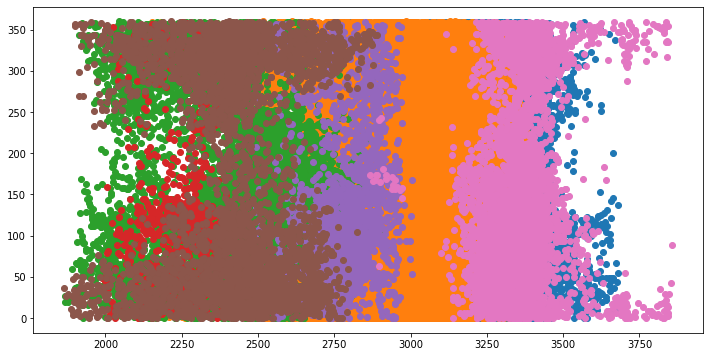

In [4]:
plt.figure(figsize=(12, 6))

for n, color in enumerate(colors):
    data = X_test[y_test == n]
    plt.scatter(data[:, 0], data[:, 1], color=color)